In [431]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import LabelEncoder

In [432]:
df = pd.read_csv('prelim_datasets/thyroid_cancer_risk.csv')

In [433]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [435]:
df.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


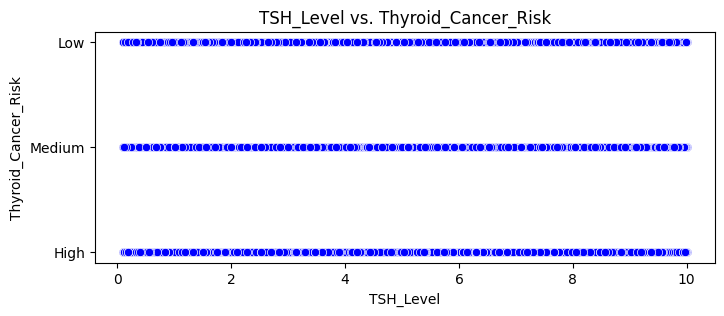

In [436]:
# Setting variables for the regression
independent_var = "TSH_Level"
dependent_var = "Thyroid_Cancer_Risk"


plt.figure(figsize=(8,3))
sns.scatterplot(x=df[independent_var], y=df[dependent_var], color="blue")
plt.xlabel(independent_var)
plt.ylabel(dependent_var)
plt.title(f"{independent_var} vs. {dependent_var}")
plt.show()

In [437]:
# Label Encoding for Ordered Categories
ordinal_columns = ["Thyroid_Cancer_Risk"]
encoder = LabelEncoder()

for col in ordinal_columns:
    df[col] = encoder.fit_transform(df[col])

In [438]:
# OPTIONAL: Converting Unordered Categories (Use if changing variables into on of these categories)

# # One-Hot Encoding for Unordered Categories
# df = pd.get_dummies(df, columns=["Gender" , "Country" , "Ethnicity" , "Family_History" , "Radiation_Exposure" , "Iodine_Deficiency" , "Smoking",
#                                  "Obesity", "Diabetes", "Diagnosis"], drop_first=True)

# Mapping for Binary Categories
diagnosis_mapping = {"Benign": 0, "Malignant": 1}
df["Diagnosis"] = df["Diagnosis"].map(diagnosis_mapping)

In [439]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,1,0
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,1,0
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,1,0
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,2,0
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,0,0


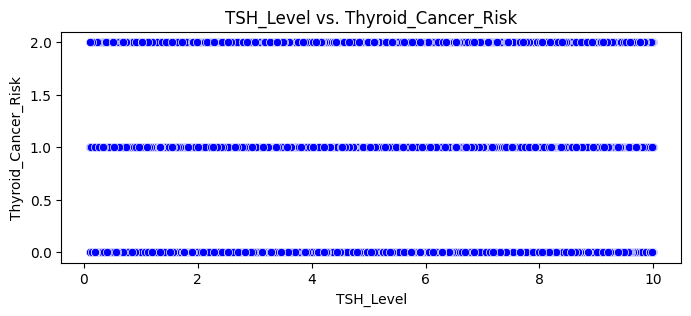

In [440]:
plt.figure(figsize=(8,3))
sns.scatterplot(x=df[independent_var], y=df[dependent_var], color="blue")
plt.xlabel(independent_var)
plt.ylabel(dependent_var)
plt.title(f"{independent_var} vs. {dependent_var}")
plt.show()

In [441]:
X = df[[independent_var]]
Y = df[dependent_var]

In [442]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [443]:
print("Training Set:")
print(X_train)
print(Y_train)

print("\nTesting Set:")
print(X_test)
print(Y_test)

Training Set:
        TSH_Level
117332       6.42
63420        5.67
179948       6.06
187371       4.97
103129       7.83
...           ...
119879       8.12
103694       3.22
131932       2.62
146867       7.47
121958       5.18

[170152 rows x 1 columns]
117332    1
63420     0
179948    0
187371    1
103129    0
         ..
119879    0
103694    1
131932    1
146867    2
121958    1
Name: Thyroid_Cancer_Risk, Length: 170152, dtype: int64

Testing Set:
        TSH_Level
82562        0.81
101549       9.90
97401        0.96
105415       5.49
152387       7.28
...           ...
71795        1.66
9325         7.23
24439        0.34
110456       2.11
196660       7.69

[42539 rows x 1 columns]
82562     1
101549    0
97401     2
105415    1
152387    2
         ..
71795     0
9325      1
24439     1
110456    1
196660    2
Name: Thyroid_Cancer_Risk, Length: 42539, dtype: int64


In [444]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [445]:
print(f"Intercept (b): {model.intercept_:.2f}") 
print(f"Coefficient (m): {model.coef_[0]:.2f}") 

Intercept (b): 1.19
Coefficient (m): -0.00


In [446]:
Y_pred = model.predict(X_test)

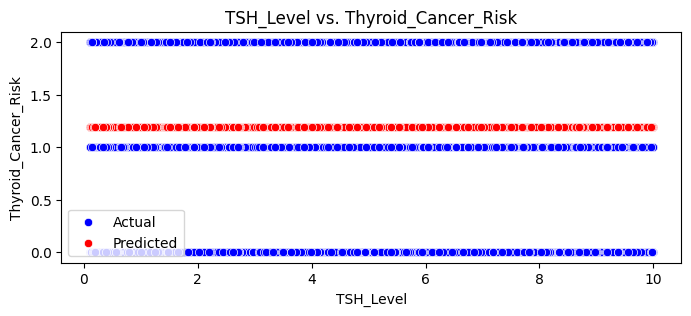

In [447]:
plt.figure(figsize=(8,3))

# Scatter plot of actual salaries
sns.scatterplot(x=X_test.values.flatten(), y=Y_test.values.flatten(), color="blue", label="Actual")

# Scatter plot of predicted salaries
sns.scatterplot(x=X_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted")

plt.xlabel(independent_var)
plt.ylabel(dependent_var)
plt.title(f"{independent_var} vs. {dependent_var}")
plt.legend()
plt.show()

In [448]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
salary_variance = np.var(Y_test)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"{dependent_var} Variance: {salary_variance:.2f}")

Mean Squared Error (MSE): 0.45
R² Score: -0.00
Thyroid_Cancer_Risk Variance: 0.45
